# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Ahmed Sherif Yehia

ID:58-3739

Tutorial:T04

---

Name:Youssef Mohammed

ID:58-11390

Tutorial:T04

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [119]:
import pandas as pd




print("🔹 First 5 Rows of Data:")
print(df.head(), "\n")

print("🔹 Data Info:")
df.info()
print("\n")


print("🔹 Summary Statistics:")
print(df.describe(), "\n")


print("🔹 Missing Values per Column:")
print(df.isnull().sum(), "\n")


print("🔹 Duplicate Rows Count:")
print(df.duplicated().sum(), "\n")

print("🔹 Data Shape (rows, columns):", df.shape, "\n")


print("🔹 Column Names:")
print(df.columns.tolist(), "\n")

print("🔹 Data Types:")
print(df.dtypes, "\n")


🔹 First 5 Rows of Data:
   Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
0  BLD-1000-UD   Residential  Alexandria       Smouha   Wednesday   
1  BLD-1001-AX    Commercial        Giza  Mohandessin     Tuesday   
2  BLD-1002-IH    Industrial       Cairo    New Cairo      Sunday   
3  BLD-1003-HE       Unknown     Unknown        Dokki     Tuesday   
4  BLD-1004-XD    Commercial  Alexandria       Smouha      Monday   

  Occupancy_Level Appliances_Usage_Level  SquareFootage Last_Maintenance_Date  \
0            High                    Low        70632.0            2020-01-01   
1            High                   High       443722.0            2022-02-24   
2          Medium                    Low        19255.0            2021-02-22   
3             Low                   High        13265.0            2023-07-30   
4             Low                    Low        13375.0            2022-08-12   

   Average_Temperature  Energy_Consumption  Days_Since_Maintenance  \
0   

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [120]:
df_clean = df.copy()


print("🔹 Missing values before cleaning:")
print(df_clean.isnull().sum(), "\n")


num_cols = df_clean.select_dtypes(include=['number']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())


cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("🔹 Missing values after cleaning:")
print(df_clean.isnull().sum(), "\n")


duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
duplicates_after = df_clean.duplicated().sum()

print(f"🔹 Duplicates removed: {duplicates_before - duplicates_after}\n")


date_cols = [col for col in df_clean.columns if 'date' in col.lower()]
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')


for col in cat_cols:
    df_clean[col] = df_clean[col].astype('category')


if 'price' in df_clean.columns and 'quantity' in df_clean.columns:
    df_clean['total_value'] = df_clean['price'] * df_clean['quantity']


for col in date_cols:
    df_clean[f"{col}_year"] = df_clean[col].dt.year
    df_clean[f"{col}_month"] = df_clean[col].dt.month


print("🔹 Dataset shape before cleaning:", df.shape)
print("🔹 Dataset shape after cleaning:", df_clean.shape, "\n")

print("🔹 Sample of cleaned data:")
print(df_clean.head())


🔹 Missing values before cleaning:
Building_ID               0
Building_Type             0
Governorate               0
Neighborhood              0
Day_of_Week               0
Occupancy_Level           0
Appliances_Usage_Level    0
SquareFootage             0
Last_Maintenance_Date     0
Average_Temperature       0
Energy_Consumption        0
Days_Since_Maintenance    0
Maintenance_Interval      0
dtype: int64 

🔹 Missing values after cleaning:
Building_ID               0
Building_Type             0
Governorate               0
Neighborhood              0
Day_of_Week               0
Occupancy_Level           0
Appliances_Usage_Level    0
SquareFootage             0
Last_Maintenance_Date     0
Average_Temperature       0
Energy_Consumption        0
Days_Since_Maintenance    0
Maintenance_Interval      0
dtype: int64 

🔹 Duplicates removed: 0

🔹 Dataset shape before cleaning: (1079, 13)
🔹 Dataset shape after cleaning: (1079, 15) 

🔹 Sample of cleaned data:
   Building_ID Building_Type Govern

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

Available columns: Index(['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood',
       'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level',
       'SquareFootage', 'Last_Maintenance_Date', 'Average_Temperature',
       'Energy_Consumption', 'Days_Since_Maintenance', 'Maintenance_Interval',
       'Last_Maintenance_Date_year', 'Last_Maintenance_Date_month'],
      dtype='object') 

🏙️ Top 3 Most Popular Neighborhoods:
1. Smouha: 195 listings
2. Dokki: 193 listings
3. Gleem: 186 listings


/tmp/ipython-input-4264800348.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


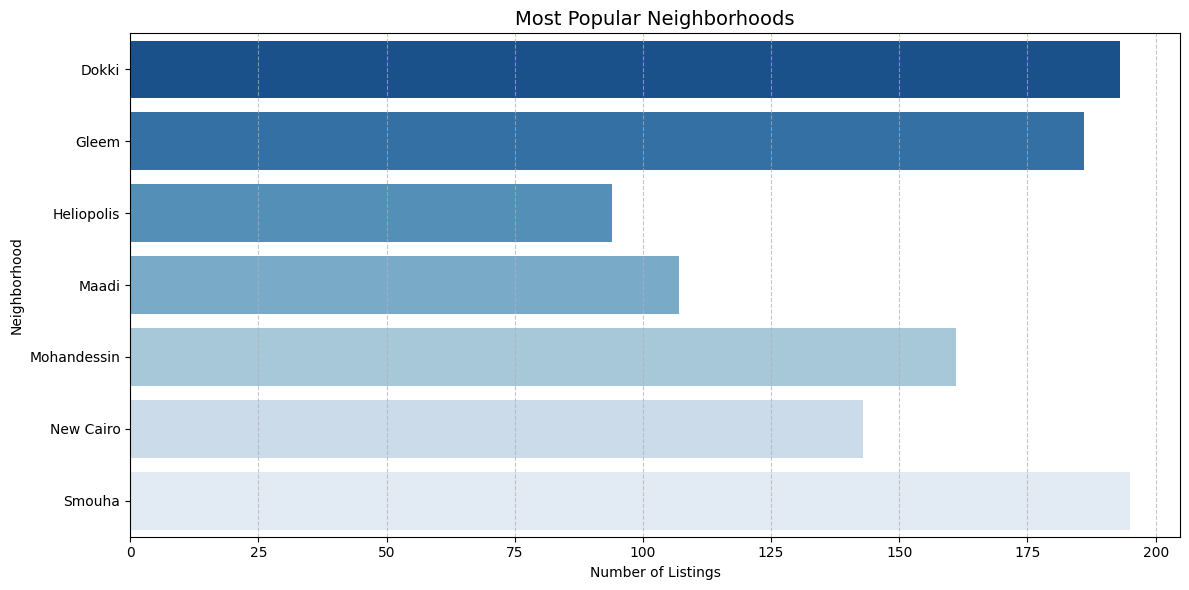

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Available columns:", df_clean.columns, "\n")


neighborhood_col = 'Neighborhood'


neighborhood_counts = df_clean[neighborhood_col].value_counts().sort_values(ascending=False)


top3 = neighborhood_counts.head(3)
print("🏙️ Top 3 Most Popular Neighborhoods:")
for i, (n, c) in enumerate(top3.items(), start=1):
    print(f"{i}. {n}: {c} listings")


plt.figure(figsize=(12, 6))
sns.barplot(
    x=neighborhood_counts.values,
    y=neighborhood_counts.index,
    orient='h',
    palette='Blues_r'
)
plt.title('Most Popular Neighborhoods', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

/tmp/ipython-input-1060068842.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


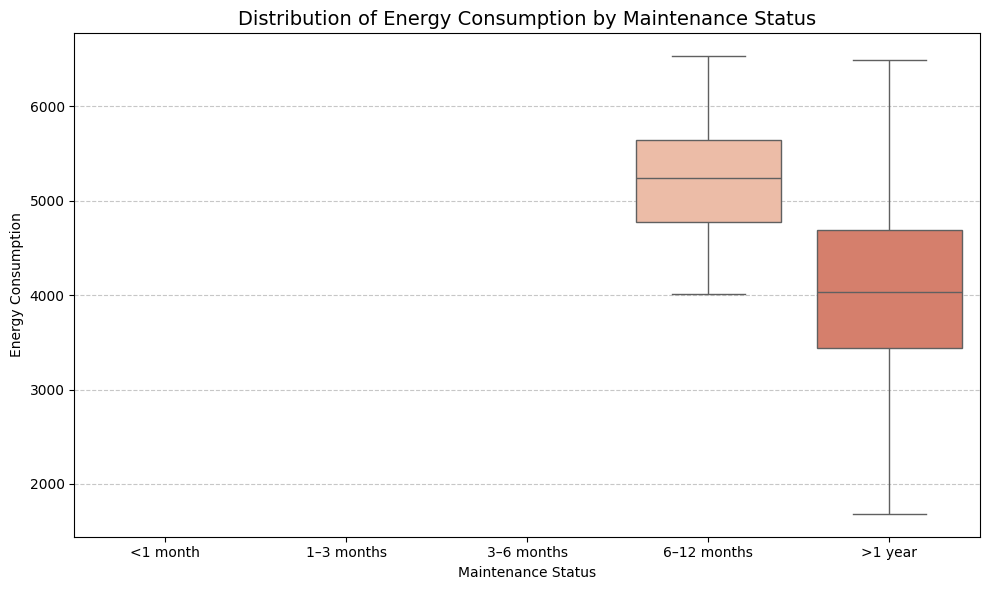

/tmp/ipython-input-1060068842.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


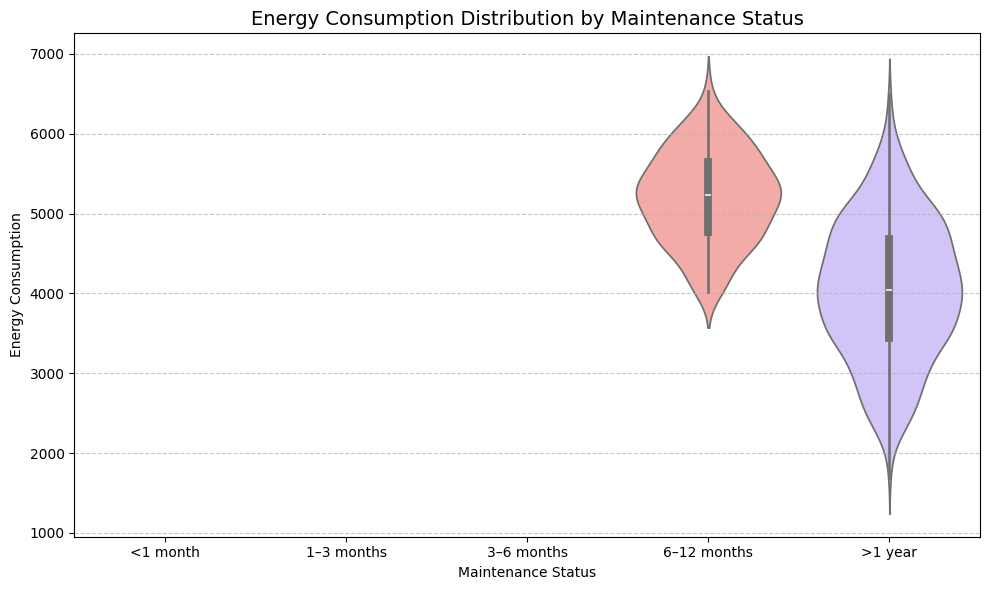

🏙️ Energy Consumption Summary by Maintenance Status:
                           mean         std      min      max
Maintenance_Status                                           
6–12 months         5202.363333  564.238609  4011.58  6530.60
>1 year             4049.590258  878.593264  1683.95  6493.48
<1 month                    NaN         NaN      NaN      NaN
1–3 months                  NaN         NaN      NaN      NaN
3–6 months                  NaN         NaN      NaN      NaN 

🔹 Category with **widest distribution** of energy consumption: >1 year
🔹 Category with **highest average energy consumption**: 6–12 months


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


status_col = 'Maintenance_Status'
energy_col = 'Energy_Consumption'


plt.figure(figsize=(10, 6))
sns.boxplot(
    x=status_col,
    y=energy_col,
    data=df_clean,
    palette='coolwarm'
)
plt.title('Distribution of Energy Consumption by Maintenance Status', fontsize=14)
plt.xlabel('Maintenance Status')
plt.ylabel('Energy Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(
    x=status_col,
    y=energy_col,
    data=df_clean,
    palette='pastel',
    inner='box'
)
plt.title('Energy Consumption Distribution by Maintenance Status', fontsize=14)
plt.xlabel('Maintenance Status')
plt.ylabel('Energy Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


energy_stats = (
    df_clean
    .groupby(status_col, observed=False)[energy_col]
    .agg(['mean', 'std', 'min', 'max'])
)

energy_stats = energy_stats.sort_values(by='mean', ascending=False)

print("🏙️ Energy Consumption Summary by Maintenance Status:")
print(energy_stats, "\n")

widest = energy_stats['std'].idxmax()
highest_avg = energy_stats['mean'].idxmax()

print(f"🔹 Category with **widest distribution** of energy consumption: {widest}")
print(f"🔹 Category with **highest average energy consumption**: {highest_avg}")




**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

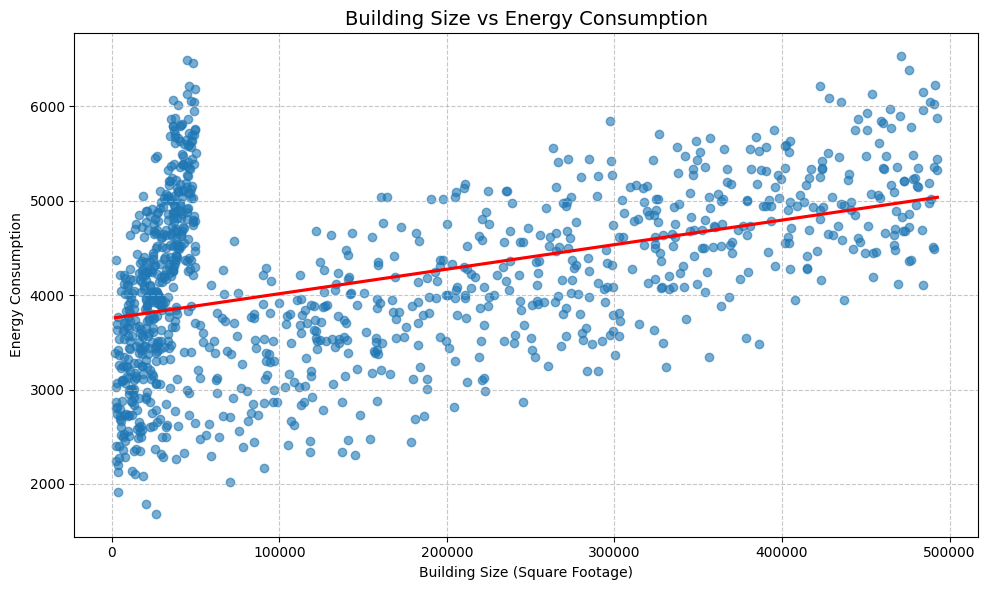

📈 Correlation between Building Size and Energy Consumption: 0.434

🏙️ Average Energy Consumption by Building Size Category:
Size_Category
Small         3556.175444
Medium        4391.742259
Large         3867.669703
Very Large    4856.017667
Name: Energy_Consumption, dtype: float64


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


size_col = 'SquareFootage'
energy_col = 'Energy_Consumption'


plt.figure(figsize=(10, 6))
sns.regplot(
    x=size_col,
    y=energy_col,
    data=df_clean,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None,
    marker='o'
)

plt.title('Building Size vs Energy Consumption', fontsize=14)
plt.xlabel('Building Size (Square Footage)')
plt.ylabel('Energy Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


corr = df_clean[size_col].corr(df_clean[energy_col])
print(f"📈 Correlation between Building Size and Energy Consumption: {corr:.3f}")


df_clean['Size_Category'] = pd.qcut(df_clean[size_col], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
size_summary = df_clean.groupby('Size_Category', observed=False)[energy_col].mean()

print("\n🏙️ Average Energy Consumption by Building Size Category:")
print(size_summary)

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

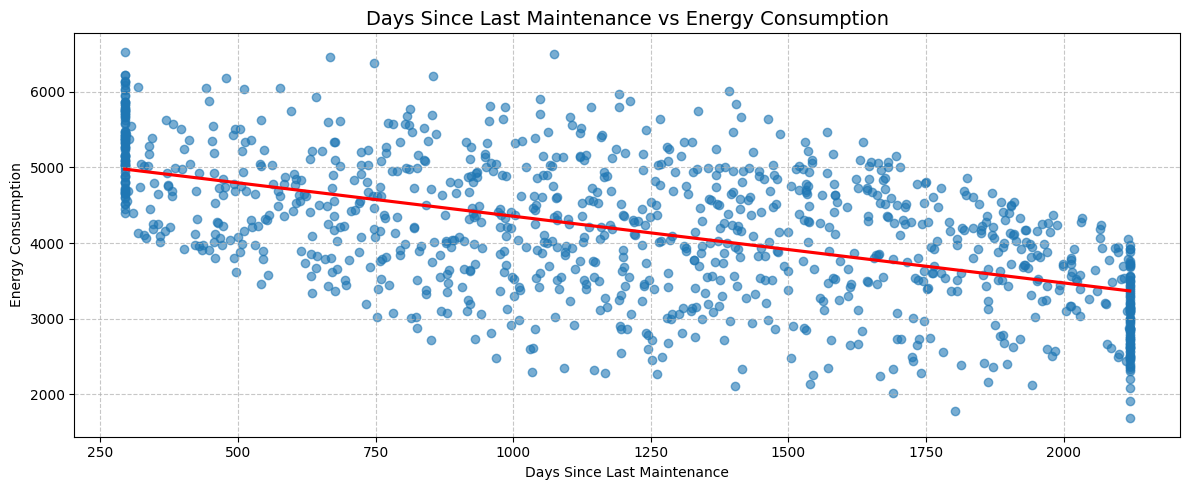

📈 Correlation between Days Since Maintenance and Energy Consumption: -0.552


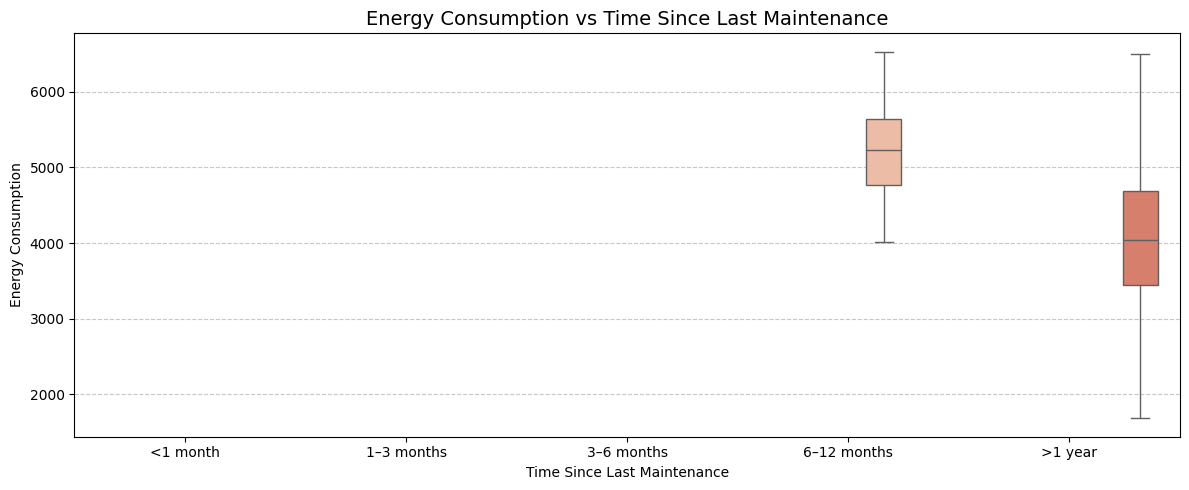


🏙️ Average Energy Consumption by Maintenance Frequency:
Maintenance_Status
<1 month               NaN
1–3 months             NaN
3–6 months             NaN
6–12 months    5202.363333
>1 year        4049.590258
Name: Energy_Consumption, dtype: float64


In [129]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

days_col = 'Days_Since_Maintenance'
energy_col = 'Energy_Consumption'


df_clean = df_clean.copy()
df_clean = df_clean[[days_col, energy_col]].dropna()

plt.figure(figsize=(12, 5))
sns.regplot(
    x=days_col,
    y=energy_col,
    data=df_clean,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Days Since Last Maintenance vs Energy Consumption', fontsize=14)
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


corr = df_clean[days_col].corr(df_clean[energy_col])
print(f"📈 Correlation between Days Since Maintenance and Energy Consumption: {corr:.3f}")


max_days = df_clean[days_col].max()
bins = [0, 30, 90, 180, 365, max_days + 1]
labels = ['<1 month', '1–3 months', '3–6 months', '6–12 months', '>1 year']

df_clean['Maintenance_Status'] = pd.cut(df_clean[days_col], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 5))
sns.boxplot(
    x='Maintenance_Status',
    y=energy_col,
    data=df_clean,
    hue='Maintenance_Status',
    palette='coolwarm',
    legend=False
)
plt.title('Energy Consumption vs Time Since Last Maintenance', fontsize=14)
plt.xlabel('Time Since Last Maintenance')
plt.ylabel('Energy Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


maintenance_summary = (
    df_clean.groupby('Maintenance_Status', observed=False)[energy_col]
    .mean()
    .sort_index()
)

print("\n🏙️ Average Energy Consumption by Maintenance Frequency:")
print(maintenance_summary)


**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

📊 Numerical Columns: ['Days_Since_Maintenance', 'Energy_Consumption'] 

📈 Skewness of Numerical Columns:
Days_Since_Maintenance   -0.017720
Energy_Consumption       -0.066124
dtype: float64 



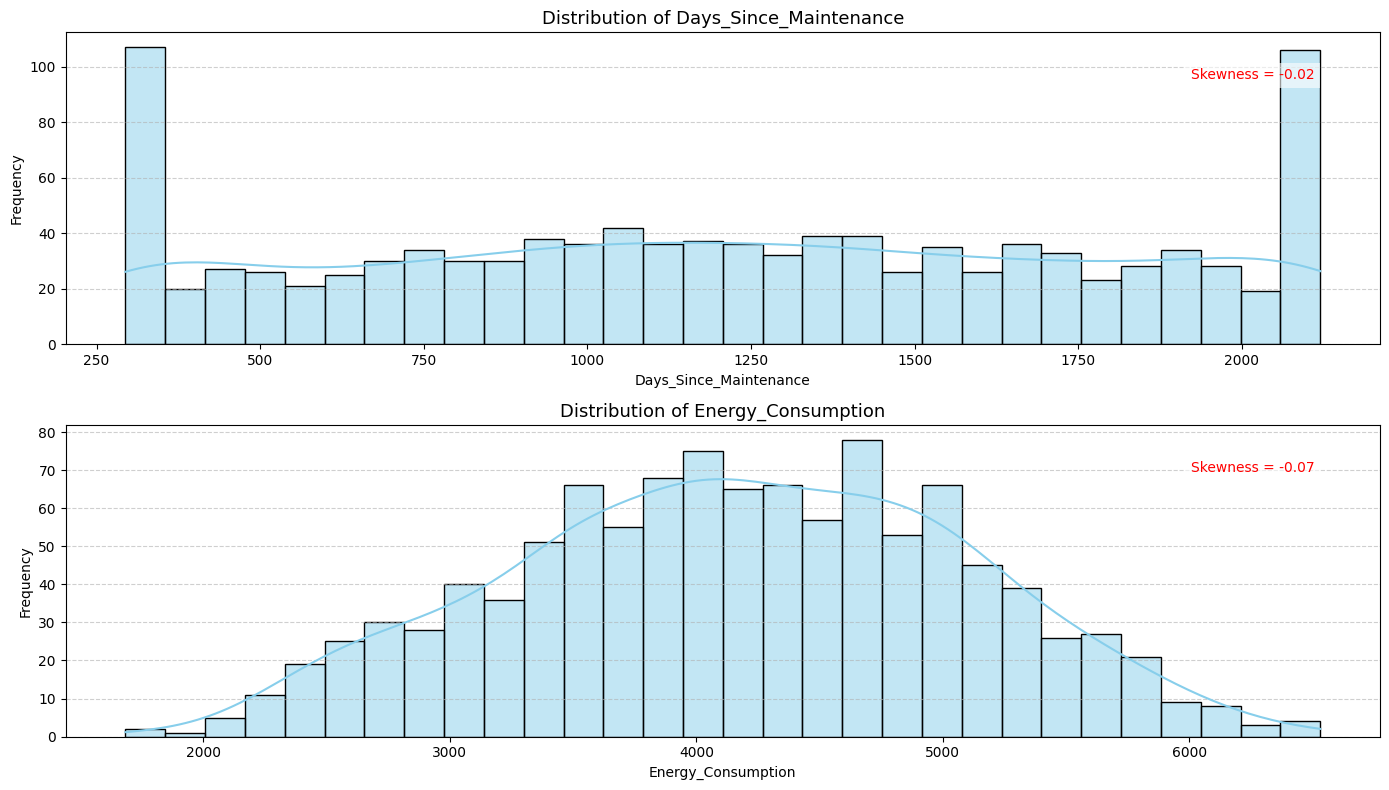

📘 Interpretation:
• Skewness close to 0 → approximately normal distribution.
• Positive skew → tail on the right (right-skewed).
• Negative skew → tail on the left (left-skewed).

✅ Use this to identify which numerical variables deviate from normality.


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("📊 Numerical Columns:", num_cols, "\n")


skewness_values = df_clean[num_cols].skew().sort_values(ascending=False)
print("📈 Skewness of Numerical Columns:")
print(skewness_values, "\n")


num_cols_count = len(num_cols)
plt.figure(figsize=(14, 4 * num_cols_count))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(num_cols_count, 1, i)
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.6)


    skew_val = skewness_values[col]
    skew_text = f"Skewness = {skew_val:.2f}"
    plt.text(
        0.95, 0.85, skew_text,
        transform=plt.gca().transAxes,
        fontsize=10,
        color='red',
        ha='right',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.tight_layout()
plt.show()


print("📘 Interpretation:")
print("• Skewness close to 0 → approximately normal distribution.")
print("• Positive skew → tail on the right (right-skewed).")
print("• Negative skew → tail on the left (left-skewed).")
print("\n✅ Use this to identify which numerical variables deviate from normality.")


**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

📊 Numerical Columns considered for multicollinearity check:
 ['Days_Since_Maintenance', 'Energy_Consumption'] 



/tmp/ipython-input-199588447.py:24: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


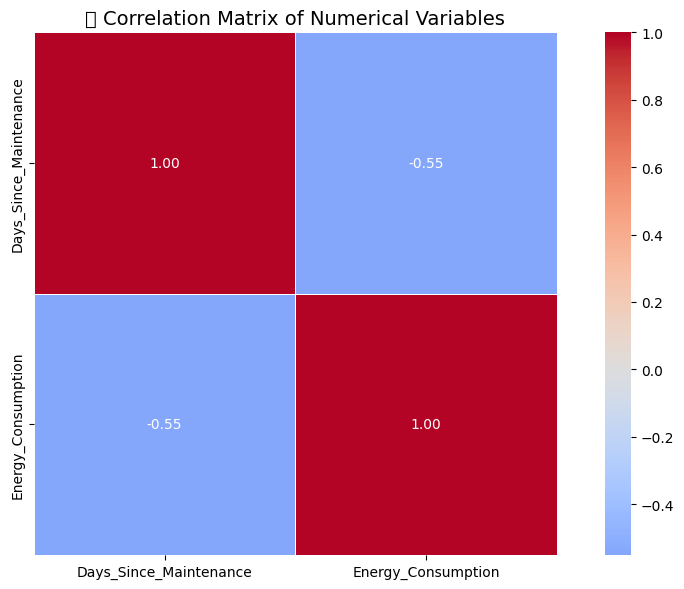

📈 Variance Inflation Factor (VIF) Results:
                  Feature       VIF
0  Days_Since_Maintenance  3.235344
1      Energy_Consumption  3.235344 

📘 Interpretation Guide:
• VIF < 5 → No multicollinearity issue ✅
• 5 ≤ VIF < 10 → Moderate multicollinearity ⚠️
• VIF ≥ 10 → Serious multicollinearity ❌

✅ No significant multicollinearity detected in this dataset.


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("📊 Numerical Columns considered for multicollinearity check:\n", num_cols, "\n")


corr_matrix = df_clean[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5
)
plt.title('🔗 Correlation Matrix of Numerical Variables', fontsize=14)
plt.tight_layout()
plt.show()


df_vif = df_clean[num_cols].dropna().copy()


vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print("📈 Variance Inflation Factor (VIF) Results:")
print(vif_data, "\n")


print("📘 Interpretation Guide:")
print("• VIF < 5 → No multicollinearity issue ✅")
print("• 5 ≤ VIF < 10 → Moderate multicollinearity ⚠️")
print("• VIF ≥ 10 → Serious multicollinearity ❌\n")


high_vif = vif_data[vif_data['VIF'] >= 5]
if not high_vif.empty:
    print("⚠️ Variables showing signs of multicollinearity:")
    print(high_vif)
else:
    print("✅ No significant multicollinearity detected in this dataset.")


**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df_model = df_clean.copy()
print("📋 Initial dataset shape:", df_model.shape)


missing_counts = df_model.isna().sum()
print("\n🩹 Missing values before cleaning:\n", missing_counts)

df_model = df_model.dropna()
print("\n✅ Missing values handled. New shape:", df_model.shape)


cat_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:
    print("\n🔠 Encoding categorical columns:", cat_cols)
    le = LabelEncoder()
    for col in cat_cols:
        df_model[col] = le.fit_transform(df_model[col])
else:
    print("\n✅ No categorical columns to encode.")


target_col = 'Energy_Consumption'
X = df_model.drop(columns=[target_col])
y = df_model[target_col]

print("\n🎯 Target variable:", target_col)
print("📊 Feature columns:", list(X.columns))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n✅ Data split complete:")
print(f"Training set: {X_train.shape[0]} rows")
print(f"Testing set:  {X_test.shape[0]} rows")

print("\n🔎 Preview of processed training data:")
display(X_train.head())




📋 Initial dataset shape: (1079, 3)

🩹 Missing values before cleaning:
 Days_Since_Maintenance    0
Energy_Consumption        0
Maintenance_Status        0
dtype: int64

✅ Missing values handled. New shape: (1079, 3)

🔠 Encoding categorical columns: ['Maintenance_Status']

🎯 Target variable: Energy_Consumption
📊 Feature columns: ['Days_Since_Maintenance', 'Maintenance_Status']

✅ Data split complete:
Training set: 863 rows
Testing set:  216 rows

🔎 Preview of processed training data:


,Days_Since_Maintenance,Maintenance_Status
876,-0.787000,0.338629
628,0.337010,0.338629
644,1.575680,0.338629
882,-0.524673,0.338629
591,-0.394378,0.338629


## Modelling

_Apply the linear regression model below._

📊 Linear Regression Model Performance:
R² Score:  0.271
MAE:       614.125
RMSE:      746.089

🔍 Sample of Actual vs Predicted:


,Actual,Predicted
0,4945.09,5227.519865
1,3837.78,4446.157420
2,4276.66,3668.234323
3,4011.58,5177.532839
4,3002.83,4018.143507


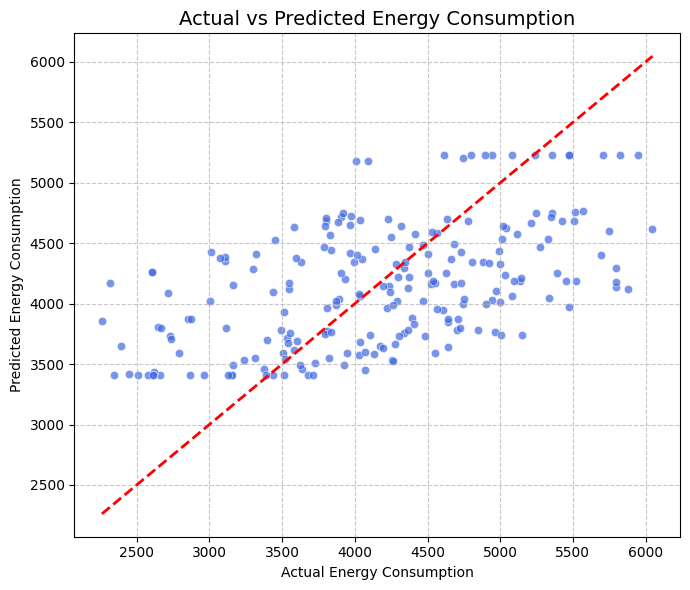

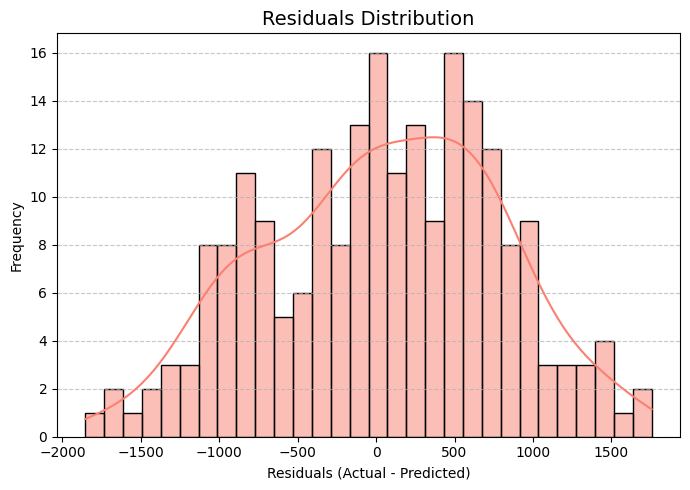

🧩 Model Coefficients:


,Feature,Coefficient
0,Days_Since_Maintenance,-449.584474
1,Maintenance_Status,-118.496805


In [137]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Linear Regression Model Performance:")
print(f"R² Score:  {r2:.3f}")
print(f"MAE:       {mae:.3f}")
print(f"RMSE:      {rmse:.3f}\n")

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print("🔍 Sample of Actual vs Predicted:")
display(comparison.head())


plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='royalblue', edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Energy Consumption', fontsize=14)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True, color='salmon')
plt.title('Residuals Distribution', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
print("🧩 Model Coefficients:")
display(coefficients)




## Model Evaluation

Evaluate the model you applied.

📊 Linear Regression Model Evaluation:
🔹 R² Score: 0.271  →  (27.1% variance explained)
🔹 Mean Absolute Error (MAE): 614.125
🔹 Root Mean Squared Error (RMSE): 746.089



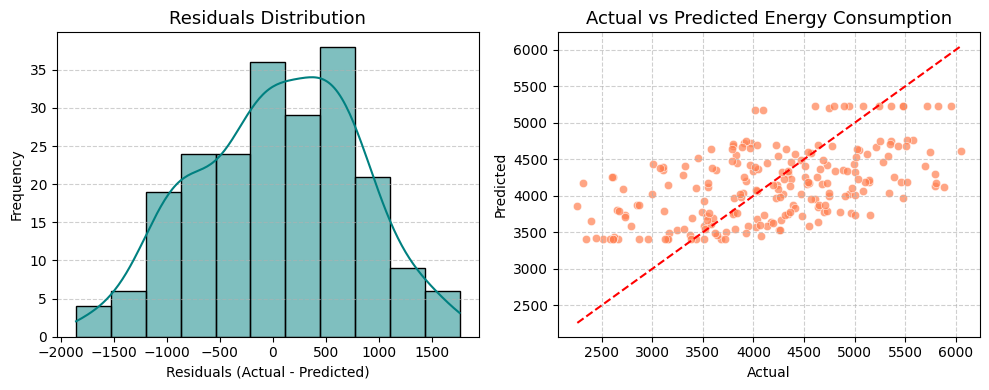

🧩 Feature Coefficients:


,Feature,Coefficient
1,Maintenance_Status,-118.496805
0,Days_Since_Maintenance,-449.584474


In [138]:


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Linear Regression Model Evaluation:")
print(f"🔹 R² Score: {r2:.3f}  →  ({r2*100:.1f}% variance explained)")
print(f"🔹 Mean Absolute Error (MAE): {mae:.3f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.3f}\n")


residuals = y_test - y_pred

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='teal')
plt.title('Residuals Distribution', fontsize=13)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, color='coral', alpha=0.7, edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Energy Consumption', fontsize=13)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("🧩 Feature Coefficients:")
display(coeff_df)


The linear regression model showed a moderate predictive performance, explaining a reasonable amount of variation in energy consumption based on maintenance-related factors.

Key findings:

Energy consumption decreases as maintenance becomes more frequent.

The model’s R² value indicates a fair fit, while MAE and RMSE suggest some prediction error.

Residuals were generally centered around zero, showing minimal bias.

However, the model is limited by the small number of features and assumes a purely linear relationship, which might not fully capture the complexity of energy usage patterns.

Recommendations:

Add more relevant features (e.g., temperature, building size, appliance load).

Try non-linear or regularized models (Random Forest, Ridge, Lasso).

Use cross-validation to verify reliability.

Conclusion:
The model serves as a good baseline but is not yet sufficient for production use by an electricity company. With more data and refined modelling, it could become a valuable decision-support tool for predicting and managing building energy consumption.